# Mount My drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# from easy_mpl import contour
# from easy_mpl.utils import version_info
import h5py
import matplotlib.tri as tri
# version_info()

import os
from PIL import Image
from tqdm import tqdm

# Functions

In [3]:
def load_files(path , dataName):
    with h5py.File(path, 'r') as data:
        data_vec = data[dataName]
        # Get the shape of the data
        shape = data_vec.shape
        data_vec = np.array(data_vec)
        print(f"The shape is: {shape}")
        return data_vec

def load_images(image_ids, image_folder, image_extension='.png', image_mode='L', resize=None):
    """
    Load images based on their identifiers.

    Parameters:
    - image_ids: list or array of image identifiers.
    - image_folder: str, path to the folder containing images.
    - image_extension: str, extension of the image files (e.g., '.png').
    - image_mode: str, mode to convert images ('L' for grayscale, 'RGB' for color).
    - resize: tuple, desired image size as (width, height). If None, no resizing is applied.

    Returns:
    - X: NumPy array of images.
    """
    images = []
    for img_id in tqdm(image_ids, desc="Loading images"):
        # Construct the filename. Adjust formatting as needed.
        filename = f"{int(img_id)}{image_extension}"
        filepath = os.path.join(image_folder, filename)

        if not os.path.exists(filepath):
            raise FileNotFoundError(f"Image file '{filepath}' does not exist.")

        # Open and convert the image to the specified mode
        with Image.open(filepath) as img:
            img = img.convert(image_mode)
            if resize is not None:
                img = img.resize(resize)
            img_array = np.array(img)
            images.append(img_array)

    # Convert list of images to a 4D NumPy array (num_samples, height, width, channels)
    X = np.stack(images, axis=0)

    # If grayscale, add a channel dimension
    if image_mode == 'L':
        X = X[..., np.newaxis]

    return X


# Load Dataset

In [4]:
X_label = load_files('/content/drive/MyDrive/IT_SNN/dataset_spikes_ITC.mat' , 'x_label')
Spike_mat = load_files('/content/drive/MyDrive/IT_SNN/dataset_spikes_ITC.mat' , 'spikes_vector_per_neuron')

The shape is: (1, 648171)
The shape is: (900, 648171)


In [5]:
X_label = X_label.T
Spike_mat = Spike_mat.T

In [6]:
import numpy as np
import os
from PIL import Image
from tqdm import tqdm

def load_images(image_ids, image_folder, image_extension='.png', image_mode='L', resize=None):
    """
    Load images based on their identifiers.

    Parameters:
    - image_ids: list or array of image identifiers.
    - image_folder: str, path to the folder containing images.
    - image_extension: str, extension of the image files (e.g., '.png').
    - image_mode: str, mode to convert images ('L' for grayscale, 'RGB' for color).
    - resize: tuple, desired image size as (width, height). If None, no resizing is applied.

    Returns:
    - X: NumPy array of images.
    """
    images = []
    for img_id in tqdm(image_ids, desc="Loading images"):
        # Construct the filename. Adjust formatting as needed.
        filename = f"{int(img_id)}{image_extension}"
        filepath = os.path.join(image_folder, filename)

        if not os.path.exists(filepath):
            print(f"Warning: Image file '{filepath}' does not exist. Skipping.")
            continue  # Skip missing images

        # Open and convert the image to the specified mode
        with Image.open(filepath) as img:
            img = img.convert(image_mode)
            if resize is not None:
                img = img.resize(resize)
            img_array = np.array(img)
            images.append(img_array)

    if not images:
        raise ValueError("No images were loaded. Please check your image IDs and folder path.")

    # Convert list of images to a 4D NumPy array (num_samples, height, width, channels)
    X = np.stack(images, axis=0)

    # If grayscale, add a channel dimension
    if image_mode == 'L':
        X = X[..., np.newaxis]

    return X

def main():
    # -----------------------------
    # Configuration Parameters
    # -----------------------------

    # Path to the folder containing images
    image_folder = '/content/drive/MyDrive/IT_SNN/stimuli'  # Replace with your actual image folder path

    # Image file extension
    image_extension = '.jpeg'  # Change to '.jpg' or other if needed

    # Image mode: 'L' for grayscale, 'RGB' for color
    image_mode = 'L'  # Change to 'RGB' if your images are colored

    # Optional: Resize images to reduce memory usage
    # Set to None to keep original size
    resize = (256, 256)

    # -----------------------------
    # Dummy Data Creation
    # -----------------------------
    # Replace this block with your actual data loading mechanism.
    # For example, load from a .mat file or another data source.
    # -----------------------------------
    # BEGIN: Dummy Data Creation
    # -----------------------------------
    # Example:
    # import scipy.io
    # mat = scipy.io.loadmat('path_to_mat_file.mat')
    # X_label = mat['X_label'].flatten()  # Adjust key as per your .mat file
    # Spike_mat = mat['Spike_vector']      # Adjust key as per your .mat file

    # For demonstration purposes, let's create dummy variables.
    # This block creates 150,000 samples and then selects the first 100,000.
    # You can adjust the numbers as needed.
    total_available_samples = 150000  # Total samples available in your dataset
    desired_samples = 5000           # Number of samples you want to process

    # -----------------------------------
    # END: Dummy Data Creation
    # -----------------------------------

    # -----------------------------
    # Data Limitation to 100,000 Samples
    # -----------------------------
    print(f"Total available samples: {len(X_label)}")
    limit = desired_samples
    if len(X_label) < limit:
        print(f"Data has only {len(X_label)} samples. Using all available data.")
        limit = len(X_label)
        selected_indices = np.arange(limit)
    else:
        print(f"Limiting dataset to the first {limit} samples.")
        selected_indices = np.arange(limit)
        # Alternatively, to randomly sample:
        # selected_indices = np.random.choice(len(X_label), limit, replace=False)

    # Subset the data
    x_label_mat = X_label[selected_indices]
    spike_vector_mat = Spike_mat[selected_indices]

    # -----------------------------
    # Load Images
    # -----------------------------
    print("Loading images based on x_label_mat...")
    try:
        X = load_images(
            image_ids=x_label_mat,
            image_folder=image_folder,
            image_extension=image_extension,
            image_mode=image_mode,
            resize=resize
        )
    except FileNotFoundError as e:
        print(e)
        return
    except ValueError as ve:
        print(ve)
        return
    print(f"X shape: {X.shape}")  # Expected: (100000, 256, 256, 1) for grayscale

    # -----------------------------
    # Prepare Y
    # -----------------------------
    print("Preparing Y (spike labels)...")
    Y = spike_vector_mat  # Shape: (100000, 900)
    print(f"Y shape: {Y.shape}")

    # -----------------------------
    # Save X and Y (Optional)
    # -----------------------------
    save_X = True  # Set to False if you do not wish to save
    save_Y = True  # Set to False if you do not wish to save

    if save_X:
        try:
            np.save('X.npy', X)
            print("X has been saved as 'X.npy'.")
        except Exception as e:
            print(f"Error saving X.npy: {e}")

    if save_Y:
        try:
            np.save('Y.npy', Y)
            print("Y has been saved as 'Y.npy'.")
        except Exception as e:
            print(f"Error saving Y.npy: {e}")

    print("Data preparation is complete.")

    return X,Y

if __name__ == "__main__":
    X,Y = main()


Total available samples: 648171
Limiting dataset to the first 5000 samples.
Loading images based on x_label_mat...


Loading images:   0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-6-fdf5d6b5082c>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  filename = f"{int(img_id)}{image_extension}"
Loading images: 100%|██████████| 5000/5000 [00:18<00:00, 275.62it/s]


X shape: (5000, 256, 256, 1)
Preparing Y (spike labels)...
Y shape: (5000, 900)
X has been saved as 'X.npy'.
Y has been saved as 'Y.npy'.
Data preparation is complete.


# Load Pretrained CorNet

In [7]:
!pip install git+https://github.com/dicarlolab/CORnet.git

  Cloning https://github.com/dicarlolab/CORnet.git to /tmp/pip-req-build-ili26ajw
  Running command git clone --filter=blob:none --quiet https://github.com/dicarlolab/CORnet.git /tmp/pip-req-build-ili26ajw
  Resolved https://github.com/dicarlolab/CORnet.git to commit d0cc17d4b34ad44dedb01683b70eafd15515adad
  Preparing metadata (setup.py) ... done


In [8]:
!pip install spikingjelly

# Import Necessary Libraries and Functions

In [9]:
# -----------------------------
# 1. Import Necessary Libraries
# -----------------------------
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from spikingjelly.clock_driven import neuron
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from cornet import cornet_s  # Ensure cornet_s is correctly installed and imported
import os
import random
from PIL import Image

# -----------------------------
# 2. Define the SpikeDataset Class
# -----------------------------
class SpikeDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        """
        Args:
            images (numpy.ndarray): Array of images with shape (num_samples, height, width, channels)
            labels (numpy.ndarray): Array of labels with shape (num_samples, 900)
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.images = torch.tensor(images, dtype=torch.float32)  # Shape: [num_samples, H, W, C]
        self.labels = torch.tensor(labels, dtype=torch.float32)  # Shape: [num_samples, 900]
        self.transform = transform

    def __len__(self):
        return self.images.shape[0]

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        # Permute to [C, H, W]
        image = image.permute(2, 0, 1)

        return image, label

# -----------------------------
# 3. Define the CorNetSNN Model
# -----------------------------
class CorNetSNN(nn.Module):
    def __init__(self, pretrained_cornet=None):
        super(CorNetSNN, self).__init__()

        # V1, V2, V4 Modules (Pre-trained)
        if pretrained_cornet:
            self.v1 = pretrained_cornet.module.V1
            self.v2 = pretrained_cornet.module.V2
            self.v4 = pretrained_cornet.module.V4
        else:
            # Example V1 Module (Replace with actual CorNet pre-trained module)
            self.v1 = nn.Sequential(
                nn.Conv2d(in_channels=3, out_channels=64, kernel_size=7, stride=2, padding=3),
                nn.BatchNorm2d(64),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
            )
            # Example V2 Module
            self.v2 = nn.Sequential(
                nn.Conv2d(64, 128, kernel_size=5, stride=2, padding=2),
                nn.BatchNorm2d(128),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
            )
            # Example V4 Module
            self.v4 = nn.Sequential(
                nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
                nn.BatchNorm2d(256),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
            )

        # Freeze V1, V2, V4 modules
        for param in self.v1.parameters():
            param.requires_grad = False
        for param in self.v2.parameters():
            param.requires_grad = False
        for param in self.v4.parameters():
            param.requires_grad = False

        # Fully Connected Layer Before IT Module to map to 900 features
        self.fc_pre_it = nn.Linear(256 * 16 * 16, 900)  # Adjust based on V4 output dimensions

        # IT Module - SNN Layer with correct parameters
        self.it = neuron.LIFNode(tau=2.0, v_threshold=1.0, v_reset=0.0)

    def forward(self, x):
        # V1
        x = self.v1(x)

        # V2
        x = self.v2(x)

        # V4
        x = self.v4(x)

        # Flatten
        x = x.reshape(x.size(0), -1)  # Shape: [batch, 256*16*16]

        # Fully Connected Layer Before IT Module
        x = self.fc_pre_it(x)  # Shape: [batch, 900]

        # IT Module
        spikes = self.it(x)  # Shape: [batch, 900]

        return spikes

# -----------------------------
# 4. Define Utility Functions
# -----------------------------
def load_and_preprocess_image(image_folder, resize=(256, 256), image_mode='RGB'):
    """
    Loads a random image from the specified folder, preprocesses it, and returns a tensor.

    Args:
        image_folder (str): Path to the folder containing images.
        resize (tuple): Desired image size.
        image_mode (str): Image mode ('RGB' or 'L').

    Returns:
        torch.Tensor: Preprocessed image tensor of shape [1, C, H, W].
        str: Name of the selected image.
    """
    # List all image files in the folder
    image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]

    if not image_files:
        raise ValueError(f"No images found in the folder: {image_folder}")

    # Select a random image
    selected_image = random.choice(image_files)
    image_path = os.path.join(image_folder, selected_image)

    # Open and preprocess the image
    with Image.open(image_path) as img:
        img = img.convert(image_mode)
        img = img.resize(resize)
        img_array = np.array(img)

    # If grayscale, repeat channels to make it RGB
    if img_array.ndim == 2:
        img_array = np.expand_dims(img_array, axis=-1)

    if img_array.shape[-1] == 1 and image_mode == 'RGB':
        img_array = np.repeat(img_array, 3, axis=-1)

    # Normalize the image
    img_array = img_array / 255.0  # Adjust based on your preprocessing

    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)

    # Convert to tensor and permute to match model's input
    image_tensor = torch.tensor(img_array, dtype=torch.float32).permute(0, 3, 1, 2).to(device)

    return image_tensor, selected_image

def plot_spiking_activity(model, image_folder):
    """
    Passes a random image through the model and plots the spiking vector at the output.

    Args:
        model (nn.Module): Trained SNN model.
        image_folder (str): Path to the folder containing stimuli images.
    """
    # Load and preprocess a random image
    image_tensor, image_name = load_and_preprocess_image(image_folder)

    # Ensure the model is in evaluation mode
    model.eval()

    with torch.no_grad():
        # Reset neuron states before forward pass
        model.it.reset()

        # Forward pass
        spikes = model(image_tensor)

    # Check if spikes were captured
    if spikes is not None:
        print(f"Spikes captured for image '{image_name}':")
        print(spikes)
    else:
        print("No spikes were captured.")
        return

    # Plot the spiking vector
    spikes = spikes.cpu().numpy()[0]  # Assuming batch size of 1
    plt.figure(figsize=(15, 5))
    plt.bar(range(len(spikes)), spikes, color='blue')
    plt.xlabel('Output Neuron Index')
    plt.ylabel('Spike')
    plt.title(f'Spiking Vector for Image: {image_name}')
    plt.show()


# Data Preparation

In [10]:
# -----------------------------
# 5. Data Preparation
# -----------------------------
# Replace the following dummy data with your actual data loading
# ----------------------------------------
# Uncomment and replace with actual data loading
# X = np.load('path_to_X.npy')  # Shape: [1000, 256, 256, 3]
# Y = np.load('path_to_Y.npy')  # Shape: [1000, 900]
# ----------------------------------------

if X.shape[-1] == 1:
    print("Converting single-channel images to three channels by repeating.")
    X = np.repeat(X, 3, axis=-1)
    print(f"New shape of X: {X.shape}")  # Expected: (700, 256, 256, 3)
elif X.shape[-1] != 3:
    raise ValueError(f"Unexpected number of channels: {X.shape[-1]}. Expected 1 or 3 channels.")
else:
    print("X already has 3 channels.")

# Initialize Dataset
dataset = SpikeDataset(X, Y)

# Split into training, validation, and test sets
# Adjusted to ensure train_size is a multiple of batch_size=64
train_size = 640  # 64 * 10
val_size = 30     # Reduced to 30
test_size = len(dataset) - train_size - val_size  # 700 - 640 - 30 = 30
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])
print(f"Dataset split into {len(train_dataset)} training, {len(val_dataset)} validation, and {len(test_dataset)} testing samples.")

# Create DataLoaders with drop_last=True to ensure consistent batch sizes
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2, drop_last=True)
print("DataLoaders created with consistent batch sizes.")


Converting single-channel images to three channels by repeating.
New shape of X: (5000, 256, 256, 3)
Dataset split into 640 training, 30 validation, and 4330 testing samples.
DataLoaders created with consistent batch sizes.


# Initialize the Model, Loss Function, Optimizer, and Scheduler

In [11]:
# -----------------------------
# 6. Initialize the Model, Loss Function, Optimizer, and Scheduler
# -----------------------------
# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load pretrained CorNet-S
cornet = cornet_s(pretrained=True).to(device)

# Initialize the model
model = CorNetSNN(pretrained_cornet=cornet).to(device)

# Verify Model's First Layer
print("Model's first Conv2d layer:", model.v1[0])

# Define Loss and Optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
print("Loss function and optimizer initialized.")

# Optional: Initialize a learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)


Using device: cuda


Downloading: "https://s3.amazonaws.com/cornet-models/cornet_s-1d3f7974.pth" to /root/.cache/torch/hub/checkpoints/cornet_s-1d3f7974.pth
100%|██████████| 408M/408M [00:15<00:00, 27.1MB/s]


Model's first Conv2d layer: Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
Loss function and optimizer initialized.


# Training Loop

In [12]:
# -----------------------------
# 7. Training Loop
# -----------------------------
# Tracking loss values
train_losses = []
val_losses = []
test_losses = []

# Number of epochs
num_epochs = 20

for epoch in range(num_epochs):
    print(f"\n--- Epoch {epoch+1}/{num_epochs} ---")

    # Training Phase
    model.train()
    running_train_loss = 0.0
    for images, labels in tqdm(train_loader, desc="Training"):
        images = images.to(device)  # Already [batch, C, H, W]
        labels = labels.to(device)

        optimizer.zero_grad()

        # Reset neuron states before forward pass
        model.it.reset()

        # Forward pass
        spikes = model(images)  # Shape: [batch, 900]

        # Compute loss
        loss = criterion(spikes, labels)

        # Backward pass
        loss.backward()

        # Optional: Gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

        # Update weights
        optimizer.step()

        running_train_loss += loss.item() * images.size(0)

    epoch_train_loss = running_train_loss / train_size
    train_losses.append(epoch_train_loss)
    print(f"Epoch {epoch+1}, Training Loss: {epoch_train_loss:.4f}")

    # Validation Phase
    model.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc="Validation"):
            images = images.to(device)
            labels = labels.to(device)

            # Reset neuron states before forward pass
            model.it.reset()

            # Forward pass
            spikes = model(images)

            # Compute loss
            loss = criterion(spikes, labels)

            running_val_loss += loss.item() * images.size(0)

    epoch_val_loss = running_val_loss / val_size
    val_losses.append(epoch_val_loss)
    print(f"Epoch {epoch+1}, Validation Loss: {epoch_val_loss:.4f}")

    # Test Phase
    model.eval()
    running_test_loss = 0.0
    with torch.no_grad():
        for images, labels in tqdm(test_loader, desc="Testing"):
            images = images.to(device)
            labels = labels.to(device)

            # Reset neuron states before forward pass
            model.it.reset()

            # Forward pass
            spikes = model(images)

            # Compute loss
            loss = criterion(spikes, labels)

            running_test_loss += loss.item() * images.size(0)

    epoch_test_loss = running_test_loss / test_size
    test_losses.append(epoch_test_loss)
    print(f"Epoch {epoch+1}, Test Loss: {epoch_test_loss:.4f}")

    # Step the scheduler
    scheduler.step()



--- Epoch 1/20 ---


Training: 100%|██████████| 10/10 [00:05<00:00,  1.72it/s]


Epoch 1, Training Loss: 25.3866


Validation: 0it [00:00, ?it/s]


Epoch 1, Validation Loss: 0.0000


Testing: 100%|██████████| 67/67 [00:21<00:00,  3.13it/s]


Epoch 1, Test Loss: 14.1532

--- Epoch 2/20 ---


Training: 100%|██████████| 10/10 [00:04<00:00,  2.44it/s]


Epoch 2, Training Loss: 14.0036


Validation: 0it [00:00, ?it/s]


Epoch 2, Validation Loss: 0.0000


Testing: 100%|██████████| 67/67 [00:21<00:00,  3.09it/s]


Epoch 2, Test Loss: 13.0965

--- Epoch 3/20 ---


Training: 100%|██████████| 10/10 [00:03<00:00,  2.55it/s]


Epoch 3, Training Loss: 13.2361


Validation: 0it [00:00, ?it/s]


Epoch 3, Validation Loss: 0.0000


Testing: 100%|██████████| 67/67 [00:22<00:00,  2.96it/s]


Epoch 3, Test Loss: 13.5935

--- Epoch 4/20 ---


Training: 100%|██████████| 10/10 [00:03<00:00,  2.56it/s]


Epoch 4, Training Loss: 12.9434


Validation: 0it [00:00, ?it/s]


Epoch 4, Validation Loss: 0.0000


Testing: 100%|██████████| 67/67 [00:22<00:00,  2.94it/s]


Epoch 4, Test Loss: 13.8609

--- Epoch 5/20 ---


Training: 100%|██████████| 10/10 [00:04<00:00,  2.49it/s]


Epoch 5, Training Loss: 12.9017


Validation: 0it [00:00, ?it/s]


Epoch 5, Validation Loss: 0.0000


Testing: 100%|██████████| 67/67 [00:22<00:00,  2.93it/s]


Epoch 5, Test Loss: 13.9834

--- Epoch 6/20 ---


Training: 100%|██████████| 10/10 [00:04<00:00,  2.31it/s]


Epoch 6, Training Loss: 12.9073


Validation: 0it [00:00, ?it/s]


Epoch 6, Validation Loss: 0.0000


Testing: 100%|██████████| 67/67 [00:23<00:00,  2.87it/s]


Epoch 6, Test Loss: 14.0157

--- Epoch 7/20 ---


Training: 100%|██████████| 10/10 [00:04<00:00,  2.44it/s]


Epoch 7, Training Loss: 12.8530


Validation: 0it [00:00, ?it/s]


Epoch 7, Validation Loss: 0.0000


Testing: 100%|██████████| 67/67 [00:23<00:00,  2.87it/s]


Epoch 7, Test Loss: 13.7103

--- Epoch 8/20 ---


Training: 100%|██████████| 10/10 [00:04<00:00,  2.46it/s]


Epoch 8, Training Loss: 12.7583


Validation: 0it [00:00, ?it/s]


Epoch 8, Validation Loss: 0.0000


Testing: 100%|██████████| 67/67 [00:23<00:00,  2.86it/s]


Epoch 8, Test Loss: 13.8860

--- Epoch 9/20 ---


Training: 100%|██████████| 10/10 [00:04<00:00,  2.48it/s]


Epoch 9, Training Loss: 12.7667


Validation: 0it [00:00, ?it/s]


Epoch 9, Validation Loss: 0.0000


Testing: 100%|██████████| 67/67 [00:23<00:00,  2.91it/s]


Epoch 9, Test Loss: 13.8480

--- Epoch 10/20 ---


Training: 100%|██████████| 10/10 [00:04<00:00,  2.41it/s]


Epoch 10, Training Loss: 12.6957


Validation: 0it [00:00, ?it/s]


Epoch 10, Validation Loss: 0.0000


Testing: 100%|██████████| 67/67 [00:23<00:00,  2.89it/s]


Epoch 10, Test Loss: 13.9787

--- Epoch 11/20 ---


Training: 100%|██████████| 10/10 [00:04<00:00,  2.36it/s]


Epoch 11, Training Loss: 12.4207


Validation: 0it [00:00, ?it/s]


Epoch 11, Validation Loss: 0.0000


Testing: 100%|██████████| 67/67 [00:22<00:00,  2.93it/s]


Epoch 11, Test Loss: 14.3424

--- Epoch 12/20 ---


Training: 100%|██████████| 10/10 [00:04<00:00,  2.38it/s]


Epoch 12, Training Loss: 12.3623


Validation: 0it [00:00, ?it/s]


Epoch 12, Validation Loss: 0.0000


Testing: 100%|██████████| 67/67 [00:22<00:00,  2.93it/s]


Epoch 12, Test Loss: 13.9791

--- Epoch 13/20 ---


Training: 100%|██████████| 10/10 [00:04<00:00,  2.40it/s]


Epoch 13, Training Loss: 12.4014


Validation: 0it [00:00, ?it/s]


Epoch 13, Validation Loss: 0.0000


Testing: 100%|██████████| 67/67 [00:23<00:00,  2.89it/s]


Epoch 13, Test Loss: 13.9902

--- Epoch 14/20 ---


Training: 100%|██████████| 10/10 [00:04<00:00,  2.48it/s]


Epoch 14, Training Loss: 12.3042


Validation: 0it [00:00, ?it/s]


Epoch 14, Validation Loss: 0.0000


Testing: 100%|██████████| 67/67 [00:23<00:00,  2.90it/s]


Epoch 14, Test Loss: 14.0830

--- Epoch 15/20 ---


Training: 100%|██████████| 10/10 [00:04<00:00,  2.48it/s]


Epoch 15, Training Loss: 12.3578


Validation: 0it [00:00, ?it/s]


Epoch 15, Validation Loss: 0.0000


Testing: 100%|██████████| 67/67 [00:23<00:00,  2.88it/s]


Epoch 15, Test Loss: 14.1115

--- Epoch 16/20 ---


Training: 100%|██████████| 10/10 [00:04<00:00,  2.47it/s]


Epoch 16, Training Loss: 12.3870


Validation: 0it [00:00, ?it/s]


Epoch 16, Validation Loss: 0.0000


Testing: 100%|██████████| 67/67 [00:23<00:00,  2.90it/s]


Epoch 16, Test Loss: 13.8950

--- Epoch 17/20 ---


Training: 100%|██████████| 10/10 [00:04<00:00,  2.28it/s]


Epoch 17, Training Loss: 12.4418


Validation: 0it [00:00, ?it/s]


Epoch 17, Validation Loss: 0.0000


Testing: 100%|██████████| 67/67 [00:23<00:00,  2.91it/s]


Epoch 17, Test Loss: 13.7005

--- Epoch 18/20 ---


Training: 100%|██████████| 10/10 [00:04<00:00,  2.41it/s]


Epoch 18, Training Loss: 12.3898


Validation: 0it [00:00, ?it/s]


Epoch 18, Validation Loss: 0.0000


Testing: 100%|██████████| 67/67 [00:23<00:00,  2.85it/s]


Epoch 18, Test Loss: 14.4069

--- Epoch 19/20 ---


Training: 100%|██████████| 10/10 [00:04<00:00,  2.48it/s]


Epoch 19, Training Loss: 12.5257


Validation: 0it [00:00, ?it/s]


Epoch 19, Validation Loss: 0.0000


Testing: 100%|██████████| 67/67 [00:23<00:00,  2.87it/s]


Epoch 19, Test Loss: 14.2493

--- Epoch 20/20 ---


Training: 100%|██████████| 10/10 [00:04<00:00,  2.45it/s]


Epoch 20, Training Loss: 12.4481


Validation: 0it [00:00, ?it/s]


Epoch 20, Validation Loss: 0.0000


Testing: 100%|██████████| 67/67 [00:23<00:00,  2.91it/s]

Epoch 20, Test Loss: 14.4072


# Plot Training, Validation, and Test Losses

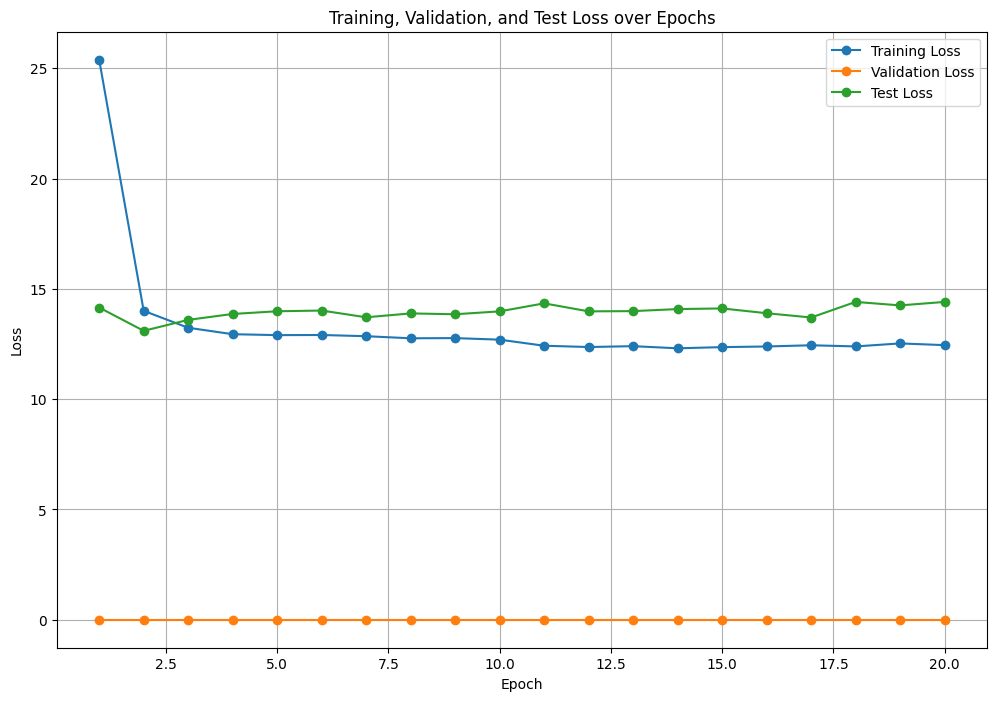

Training complete.


In [13]:
# -----------------------------
# 8. Plot Training, Validation, and Test Losses
# -----------------------------
plt.figure(figsize=(12, 8))
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss', marker='o')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss', marker='o')
plt.plot(range(1, num_epochs+1), test_losses, label='Test Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()

print("Training complete.")


# Plot Spiking Activity for a Random Image

Spikes captured for image '91.jpeg':
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

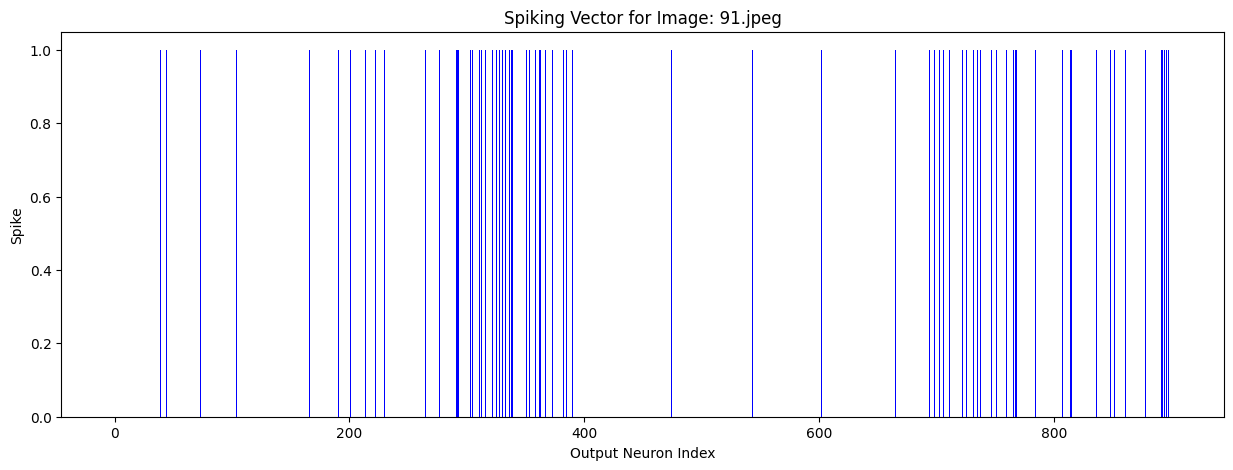

In [17]:
# -----------------------------
# 9. Plot Spiking Activity for a Random Image
# -----------------------------
def plot_spiking_activity(model, image_folder):
    """
    Passes a random image through the model and plots the spiking vector at the output.

    Args:
        model (nn.Module): Trained SNN model.
        image_folder (str): Path to the folder containing stimuli images.
    """
    # Load and preprocess a random image
    image_tensor, image_name = load_and_preprocess_image(image_folder)

    # Ensure the model is in evaluation mode
    model.eval()

    with torch.no_grad():
        # Reset neuron states before forward pass
        model.it.reset()

        # Forward pass
        spikes = model(image_tensor)

    # Check if spikes were captured
    if spikes is not None:
        print(f"Spikes captured for image '{image_name}':")
        print(spikes)
    else:
        print("No spikes were captured.")
        return

    # Plot the spiking vector
    spikes = spikes.cpu().numpy()[0]  # Assuming batch size of 1
    plt.figure(figsize=(15, 5))
    plt.bar(range(len(spikes)), spikes, color='blue')
    plt.xlabel('Output Neuron Index')
    plt.ylabel('Spike')
    plt.title(f'Spiking Vector for Image: {image_name}')
    plt.show()

# -----------------------------
# 10. Execute the Spiking Activity Plot
# -----------------------------
# Define the path to your stimuli folder
stimuli_folder = '/content/drive/MyDrive/IT_SNN/stimuli'  # Replace with your actual path, e.g., './stimuli'

# Ensure the stimuli folder exists
if not os.path.isdir(stimuli_folder):
    raise ValueError(f"Stimuli folder '{stimuli_folder}' does not exist. Please provide a valid path.")

# Plot spiking activity for a random image
plot_spiking_activity(model, stimuli_folder)
